<a href="https://colab.research.google.com/github/farahinamir/Master-Project/blob/main/Tsunami_Data_Pre_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA Loading

In [ ]:
import pandas as pd

In [ ]:
# prompt: read file

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Earthquakes data/EarthquakeData (2015-2024) (1).csv')
print("\nEarthquake dataset:")
df.head()


Earthquake dataset:


,time,place,magnitude,depth_km,longitude,latitude,type,alert,tsunami,status,id
0,2015-01-01 05:01:10.640,"near the east coast of Honshu, Japan",4.8,41.39,142.0405,38.8957,earthquake,NaN,0,reviewed,",usc000tb3v,"
1,2015-01-01 06:48:29.670,"93 km N of Isangel, Vanuatu",4.6,223.61,169.1795,-18.7052,earthquake,NaN,0,reviewed,",usc000tb42,"
2,2015-01-01 06:54:20.570,central Mid-Atlantic Ridge,4.7,10.00,-31.7641,3.4769,earthquake,NaN,0,reviewed,",usc000tb46,"
3,2015-01-01 07:12:44.230,"120 km SSE of Kirakira, Solomon Islands",4.6,26.24,162.4998,-11.3818,earthquake,NaN,0,reviewed,",usc000tb4a,"
4,2015-01-01 08:49:53.200,"70 km W of F?r?z?b?d, Iran",5.1,10.10,51.8580,28.7280,earthquake,NaN,0,reviewed,",usc000tb4f,iscgem606436879,"


In [ ]:
df.shape

(72583, 11)

In [ ]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72583 entries, 0 to 72582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       72583 non-null  object 
 1   place      72583 non-null  object 
 2   magnitude  72583 non-null  float64
 3   depth_km   72583 non-null  float64
 4   longitude  72583 non-null  float64
 5   latitude   72583 non-null  float64
 6   type       72583 non-null  object 
 7   alert      6427 non-null   object 
 8   tsunami    72583 non-null  int64  
 9   status     72583 non-null  object 
 10  id         72583 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 6.1+ MB


In [ ]:
# Identify unique and non-unique values

# Get the number of unique values in each column
unique_counts = df.nunique()

print("Number of unique values per column:")
print(unique_counts)

# Identify columns with only one unique value (non-unique)
non_unique_cols = unique_counts[unique_counts == 1].index.tolist()

print("\nColumns with only one unique value (non-unique):")
print(non_unique_cols)

Number of unique values per column:
time         72582
place        40845
magnitude      114
depth_km     22881
longitude    69880
latitude     69533
type             4
alert            4
tsunami          2
status           3
id           72583
dtype: int64

Columns with only one unique value (non-unique):
[]


In [ ]:
# SORTING
df_sorted = df.sort_values(by='time', ascending=False)
df_sorted.head()


,time,place,magnitude,depth_km,longitude,latitude,type,alert,tsunami,status,id
72582,2024-12-30 23:56:29.977,"80 km NW of Kandrian, Papua New Guinea",4.6,127.013,148.9729,-5.7603,earthquake,NaN,0,reviewed,",us6000pgkh,"
72581,2024-12-30 23:40:33.868,"247 km ENE of Levuka, Fiji",4.6,573.817,-178.3937,-17.6089,earthquake,NaN,0,reviewed,",us6000pgkd,"
72580,2024-12-30 23:30:59.974,"24 km N of Metahāra, Ethiopia",4.7,10.000,39.9276,9.1189,earthquake,NaN,0,reviewed,",us6000pgkb,"
72579,2024-12-30 23:16:09.495,"181 km WNW of Pangai, Tonga",4.6,10.000,-175.9927,-19.2777,earthquake,NaN,0,reviewed,",us6000pj77,"
72578,2024-12-30 22:13:14.697,"22 km NW of Āwash, Ethiopia",4.8,10.000,40.0367,9.1373,earthquake,NaN,0,reviewed,",us6000pgjz,"


In [ ]:
df = df.drop(['alert', 'status', 'id'], axis=1)

In [ ]:
df.describe()

,magnitude,depth_km,longitude,latitude,tsunami
count,72583.000000,72583.000000,72583.000000,72583.000000,72583.000000
mean,4.803389,63.121136,33.304390,-1.804892,0.013832
std,0.371220,115.074867,123.142047,29.754361,0.116796
min,4.500000,-1.010000,-179.999700,-79.983700,0.000000
25%,4.500000,10.000000,-72.288800,-22.229850,0.000000
50%,4.700000,14.196000,92.451800,-5.115800,0.000000
75%,4.900000,57.718000,141.491750,19.325833,0.000000
max,8.300000,683.360000,179.999300,87.386000,1.000000


In [ ]:
df.isnull().sum()

,0
time,0
place,0
magnitude,0
depth_km,0
longitude,0
latitude,0
type,0
tsunami,0


In [ ]:
df.columns

Index(['time', 'place', 'magnitude', 'depth_km', 'longitude', 'latitude',
       'type', 'tsunami'],
      dtype='object')

#Cleanning

In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72583 entries, 0 to 72582
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       72583 non-null  datetime64[ns]
 1   place      72583 non-null  object        
 2   magnitude  72583 non-null  float64       
 3   depth_km   72583 non-null  float64       
 4   longitude  72583 non-null  float64       
 5   latitude   72583 non-null  float64       
 6   type       72583 non-null  object        
 7   tsunami    72583 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.4+ MB


# Pre-processing

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72583 entries, 0 to 72582
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       72583 non-null  datetime64[ns]
 1   place      72583 non-null  object        
 2   magnitude  72583 non-null  float64       
 3   depth_km   72583 non-null  float64       
 4   longitude  72583 non-null  float64       
 5   latitude   72583 non-null  float64       
 6   type       72583 non-null  object        
 7   tsunami    72583 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.4+ MB


,time,magnitude,depth_km,longitude,latitude,tsunami
count,72583,72583.000000,72583.000000,72583.000000,72583.000000,72583.000000
mean,2020-01-17 10:46:19.970530048,4.803389,63.121136,33.304390,-1.804892,0.013832
min,2015-01-01 05:01:10.640000,4.500000,-1.010000,-179.999700,-79.983700,0.000000
25%,2017-08-12 12:50:16.085000192,4.500000,10.000000,-72.288800,-22.229850,0.000000
50%,2020-02-09 20:33:28.059000064,4.700000,14.196000,92.451800,-5.115800,0.000000
75%,2022-06-11 09:37:14.061999872,4.900000,57.718000,141.491750,19.325833,0.000000
max,2024-12-30 23:56:29.977000,8.300000,683.360000,179.999300,87.386000,1.000000
std,NaN,0.371220,115.074867,123.142047,29.754361,0.116796


In [ ]:
# Remove rows where 'depth_km' is negative
df = df[df['depth_km'] >= 0]

print("DataFrame after removing negative depth values:")
df.head()

DataFrame after removing negative depth values:


,time,place,magnitude,depth_km,longitude,latitude,type,tsunami
0,2015-01-01 05:01:10.640,"near the east coast of Honshu, Japan",4.8,41.39,142.0405,38.8957,earthquake,0
1,2015-01-01 06:48:29.670,"93 km N of Isangel, Vanuatu",4.6,223.61,169.1795,-18.7052,earthquake,0
2,2015-01-01 06:54:20.570,central Mid-Atlantic Ridge,4.7,10.00,-31.7641,3.4769,earthquake,0
3,2015-01-01 07:12:44.230,"120 km SSE of Kirakira, Solomon Islands",4.6,26.24,162.4998,-11.3818,earthquake,0
4,2015-01-01 08:49:53.200,"70 km W of F?r?z?b?d, Iran",5.1,10.10,51.8580,28.7280,earthquake,0


#Outliers

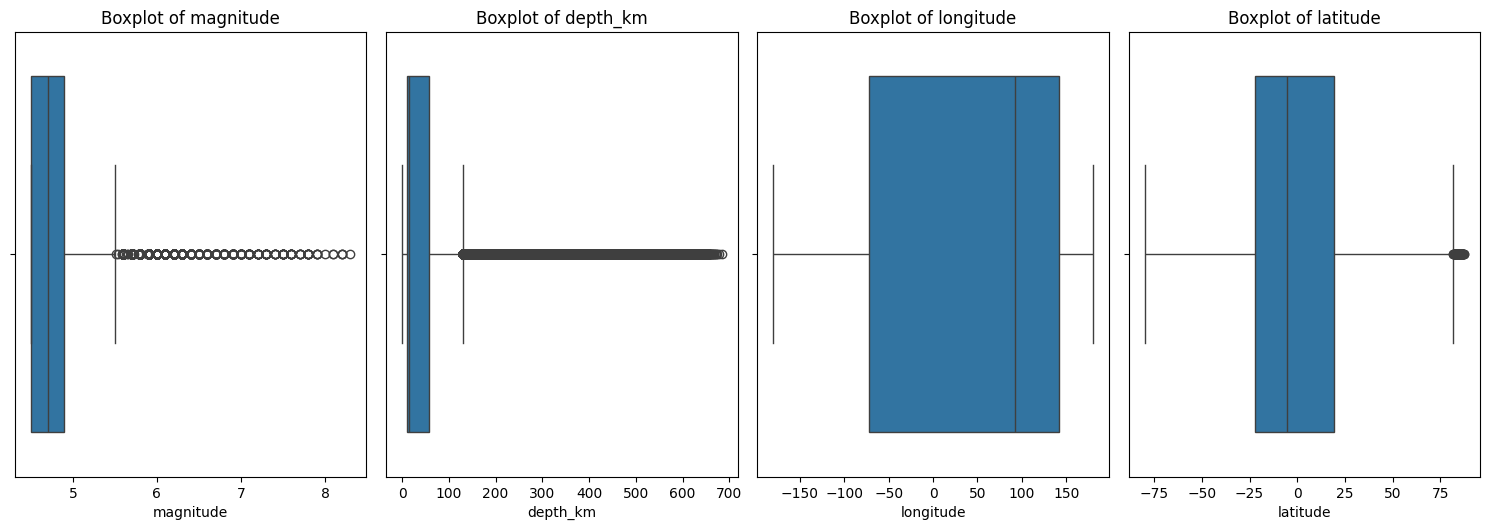

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for boxplotting
numerical_cols = [ 'magnitude', 'depth_km', 'longitude', 'latitude']

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 4, i + 1) # Adjust subplot layout to 2x2
    sns.boxplot(x=df[col]) # Use df_new instead of analysis
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#Descriptive


In [ ]:
# prompt: 5 highest earthquake

# Sort by 'Earthquake Magnitude' in descending order and select the top 5
top_5_earthquakes =df.sort_values(by='magnitude', ascending=False).head(5)

print("Top 5 Highest Magnitude Earthquakes:")
display(top_5_earthquakes)

Top 5 Highest Magnitude Earthquakes:


,time,place,magnitude,depth_km,longitude,latitude,type,tsunami
4845,2015-09-16 22:54:32.860,"48 km W of Illapel, Chile",8.3,22.44,-71.6744,-31.5729,earthquake,1
46898,2021-07-29 06:15:49.188,Alaska Peninsula,8.2,35.00,-157.8876,55.3635,earthquake,1
24950,2018-08-19 00:19:40.670,"267 km E of Levuka, Fiji",8.2,600.00,-178.1530,-18.1125,earthquake,1
18557,2017-09-08 04:49:19.180,"near the coast of Chiapas, Mexico",8.2,47.39,-93.8993,15.0222,earthquake,1
47257,2021-08-12 18:35:17.231,South Sandwich Islands region,8.1,22.79,-25.2637,-58.3753,earthquake,0


#RESULTS EDA

In [ ]:
# prompt: year and month  frequent earthquake

# Ensure 'time' is in datetime format, handling potential errors
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Reset the index to make 'time' a column again (if it was set as index)
if 'time' not in df.columns:
    df.reset_index(inplace=True)

# Extract Year and Month
df['Year'] = df['time'].dt.year
df['Month'] = df['time'].dt.month_name()

# Count occurrences for each Year-Month combination
year_month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Find the Year-Month with the maximum count
most_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmax()]

print("Year and Month with the most frequent earthquakes:")
print(f"Year: {most_frequent_year_month['Year']}")
print(f"Month: {most_frequent_year_month['Month']}")
print(f"Count: {most_frequent_year_month['Count']}")

# Optional: Display the top N most frequent Year-Month combinations
top_n = 10  # Change this to see more
print(f"\nTop {top_n} Year-Month combinations with most frequent earthquakes:")
print(year_month_counts.sort_values(by='Count', ascending=False).head(top_n))

Year and Month with the most frequent earthquakes:
Year: 2021
Month: August
Count: 1307

Top 10 Year-Month combinations with most frequent earthquakes:
    Year      Month  Count
73  2021     August   1307
79  2021      March   1258
98  2023   December   1104
11  2015  September    886
14  2016   December    868
75  2021   February    846
46  2018    October    839
95  2022  September    815
37  2018     August    796
38  2018   December    781


In [ ]:
# prompt: list the year with earthquake frequency

import pandas as pd
# Reset the index to make 'Date' a column again # Removed: earthquakes.reset_index(inplace=True)

# Convert 'time' to datetime objects, handling potential errors
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Extract the year from the 'time' column
df['Year'] = df['time'].dt.year

# Group by year and count the number of earthquakes
yearly_frequency = df['Year'].value_counts().sort_index()

# Print the result
print("Earthquake Frequency by Year:")
yearly_frequency

Earthquake Frequency by Year:


,count
Year,
2015,7099
2016,7400
2017,6330
2018,7492
2019,7154
2020,6460
2021,8910
2022,7733
2023,7622


In [ ]:
# prompt: less frequent earthquake in year and month

# Find the Year-Month with the minimum count
least_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmin()]

print("\nYear and Month with the least frequent earthquakes:")
print(f"Year: {least_frequent_year_month['Year']}")
print(f"Month: {least_frequent_year_month['Month']}")
print(f"Count: {least_frequent_year_month['Count']}")

# Optional: Display the bottom N least frequent Year-Month combinations
bottom_n = 10  # Change this to see more
print(f"\nBottom {bottom_n} Year-Month combinations with least frequent earthquakes:")
print(year_month_counts.sort_values(by='Count', ascending=True).head(bottom_n))


Year and Month with the least frequent earthquakes:
Year: 2017
Month: June
Count: 381

Bottom 10 Year-Month combinations with least frequent earthquakes:
     Year      Month  Count
30   2017       June    381
109  2024     August    450
60   2020      April    456
25   2017     August    461
19   2016      March    465
27   2017   February    465
69   2020   November    471
113  2024       July    474
22   2016    October    480
119  2024  September    481


In [ ]:
# prompt: from 2015-2024 which year has less earthquake?

import matplotlib.pyplot as plt
# Filter data for the years 2015-2025
earthquakes_2015_2025 = df[(df['Year'] >= 2015) & (df['Year'] <= 2025)]

# Count earthquakes per year in this range
yearly_counts_2015_2025 = earthquakes_2015_2025['Year'].value_counts().sort_index()

# Find the year with the minimum count
year_least_earthquakes = yearly_counts_2015_2025.idxmin()
count_least_earthquakes = yearly_counts_2015_2025.min()

print(f"\nFrom 2015 to 2024, the year with the least earthquakes is: {year_least_earthquakes}")
print(f"Number of earthquakes in {year_least_earthquakes}: {count_least_earthquakes}")

# Optional: Display counts for the 2015-2024 range
print("\nYearly earthquake counts (2015-2024):")
print(yearly_counts_2015_2025)


From 2015 to 2024, the year with the least earthquakes is: 2017
Number of earthquakes in 2017: 6330

Yearly earthquake counts (2015-2024):
Year
2015    7099
2016    7400
2017    6330
2018    7492
2019    7154
2020    6460
2021    8910
2022    7733
2023    7622
2024    6371
Name: count, dtype: int64


# Visualization

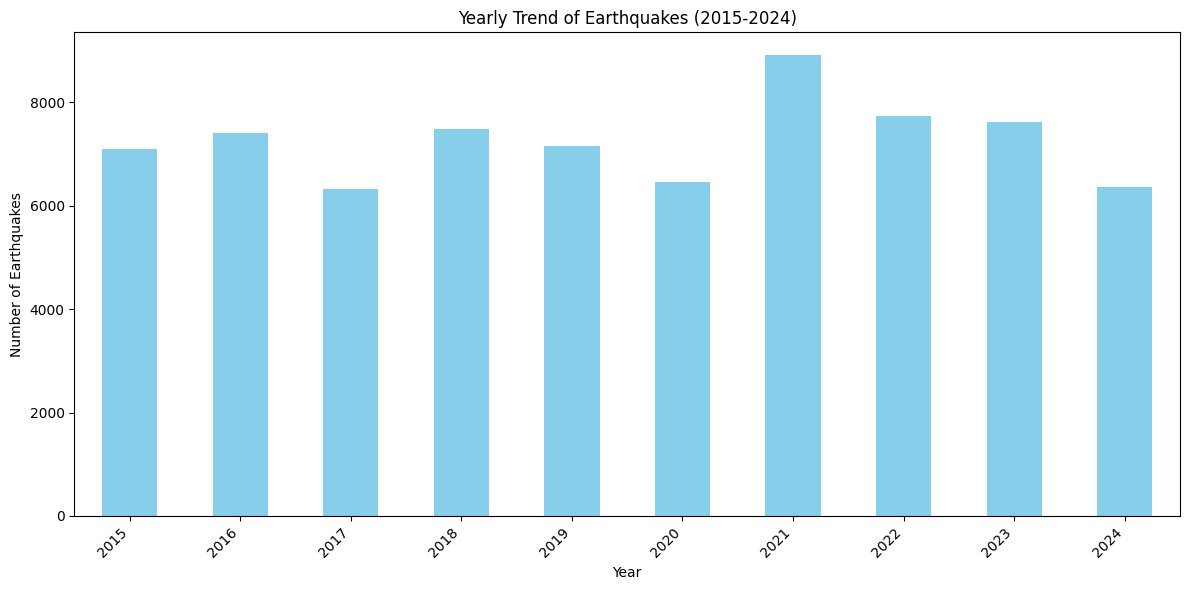

In [ ]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(12, 6))
yearly_frequency.plot(kind='bar', color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Trend of Earthquakes (2015-2024)")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter for rows where 'tsunami' is 1 (indicating a tsunami occurred)
tsunami_events = df[df['tsunami'] == 1]

# Group by year and count the number of tsunami events
yearly_tsunami_counts = tsunami_events['Year'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(12, 6))
yearly_tsunami_counts.plot(kind='bar', color='teal')
plt.xlabel("Year")
plt.ylabel("Number of Tsunamis")
plt.title("Yearly Trend of Tsunamis (2015-2024)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for earthquakes that generated a tsunami
tsunami_earthquakes = df[df['tsunami'] == 1]

# Group by 'place' and calculate the mean magnitude
average_magnitude_by_place = tsunami_earthquakes.groupby('Country')['magnitude'].mean()

# Sort by average magnitude in descending order and select the top 5
top_5_avg_magnitude_tsunami = average_magnitude_by_place.sort_values(ascending=False).head(5)

print("Top 5 Locations with Highest Average Magnitude Earthquakes that Generated Tsunamis:")
display(top_5_avg_magnitude_tsunami)

# Create a bar plot for the top 5 average magnitudes
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_avg_magnitude_tsunami.index, y=top_5_avg_magnitude_tsunami.values, color='teal')
plt.xlabel("Location")
plt.ylabel("Average Magnitude")
plt.title("Top 5 Locations with Highest Average Magnitude Earthquakes that Generated Tsunamis")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

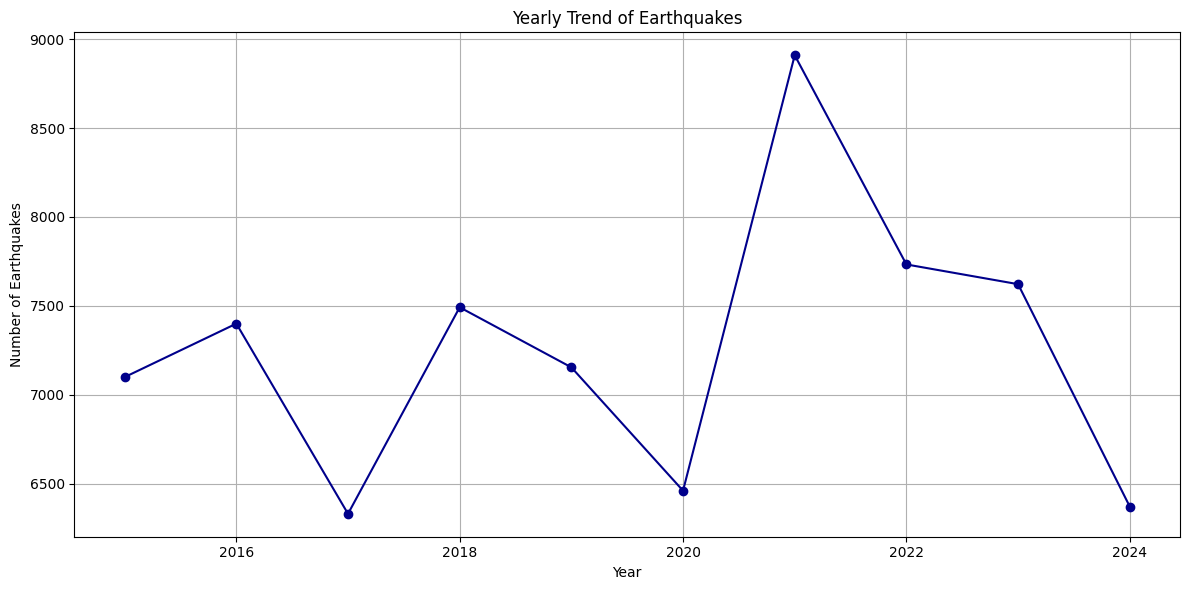

In [ ]:
# prompt: time series graph using yearly

# Safely convert 'time' to datetime with day-first format
df['time'] = pd.to_datetime(df['time'], dayfirst=True, errors='coerce')

# Count earthquakes by year
yearly_counts = df['time'].dt.year.value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-', color='darkblue')
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.title("Yearly Trend of Earthquakes")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# prompt: frequent earthquake year and month

# Count occurrences for each Year-Month combination
year_month_counts = df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Find the Year-Month with the maximum count
most_frequent_year_month = year_month_counts.loc[year_month_counts['Count'].idxmax()]

print("Year and Month with the most frequent earthquakes:")
print(f"Year: {most_frequent_year_month['Year']}")
print(f"Month: {most_frequent_year_month['Month']}")
print(f"Count: {most_frequent_year_month['Count']}")

Year and Month with the most frequent earthquakes:
Year: 2021
Month: August
Count: 1307



Frequency of earthquakes in Land vs. Sea:
Location_Type
Land    50025
Sea     22546
Name: count, dtype: int64


/tmp/ipython-input-2627193099.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_type_counts.index, y=location_type_counts.values, palette='viridis')


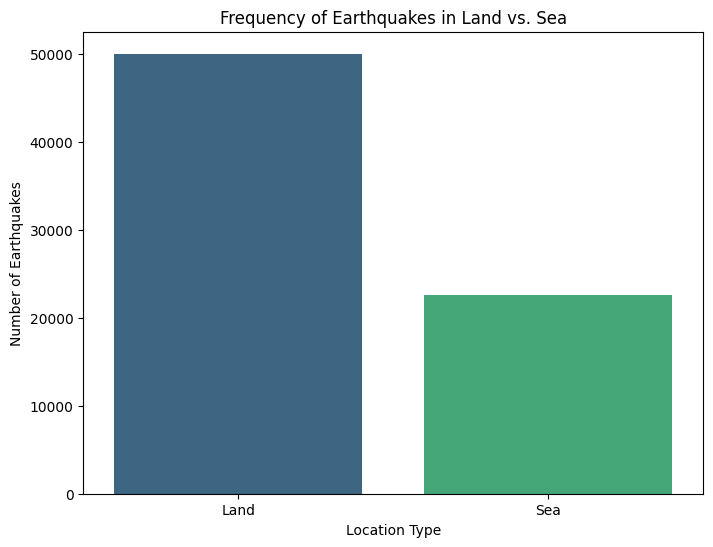

In [ ]:
# Determine if an earthquake occurred on land or at sea based on location names
# This is a simplified approach. A more accurate method would involve using GIS data.
def determine_location_type(location):
    # Simple keywords to identify sea/ocean locations
    sea_keywords = ['Sea', 'Ocean', 'Gulf', 'Bay', 'Strait', 'Ridge', 'Rise', 'Trench', 'Basin', 'Island','Islands']
    for keyword in sea_keywords:
        if keyword in location:
            return 'Sea'
    return 'Land'

df['Location_Type'] = df['place'].apply(determine_location_type)

# Count the frequency of earthquakes in land and sea
location_type_counts = df['Location_Type'].value_counts()

print("\nFrequency of earthquakes in Land vs. Sea:")
print(location_type_counts)

# Visualize the frequency
plt.figure(figsize=(8, 6))
sns.barplot(x=location_type_counts.index, y=location_type_counts.values, palette='viridis')
plt.xlabel("Location Type")
plt.ylabel("Number of Earthquakes")
plt.title("Frequency of Earthquakes in Land vs. Sea")
plt.show()


Top 10 Land Locations with Most Frequent Earthquakes:
place
Fiji region                   717
south of Tonga                192
south of Africa               167
Vanuatu region                127
southwest of Africa           115
Chagos Archipelago region      94
western Xizang                 80
Vanuatu                        77
south of Panama                70
Kepulauan Babar, Indonesia     68
Name: count, dtype: int64

Top 10 Sea Locations with Most Frequent Earthquakes:
place
South Sandwich Islands region       3188
Kermadec Islands region             1720
south of the Fiji Islands           1377
south of the Kermadec Islands        990
Kermadec Islands, New Zealand        974
southeast of the Loyalty Islands     872
Izu Islands, Japan region            850
Mid-Indian Ridge                     678
southern Mid-Atlantic Ridge          636
northern Mid-Atlantic Ridge          632
Name: count, dtype: int64


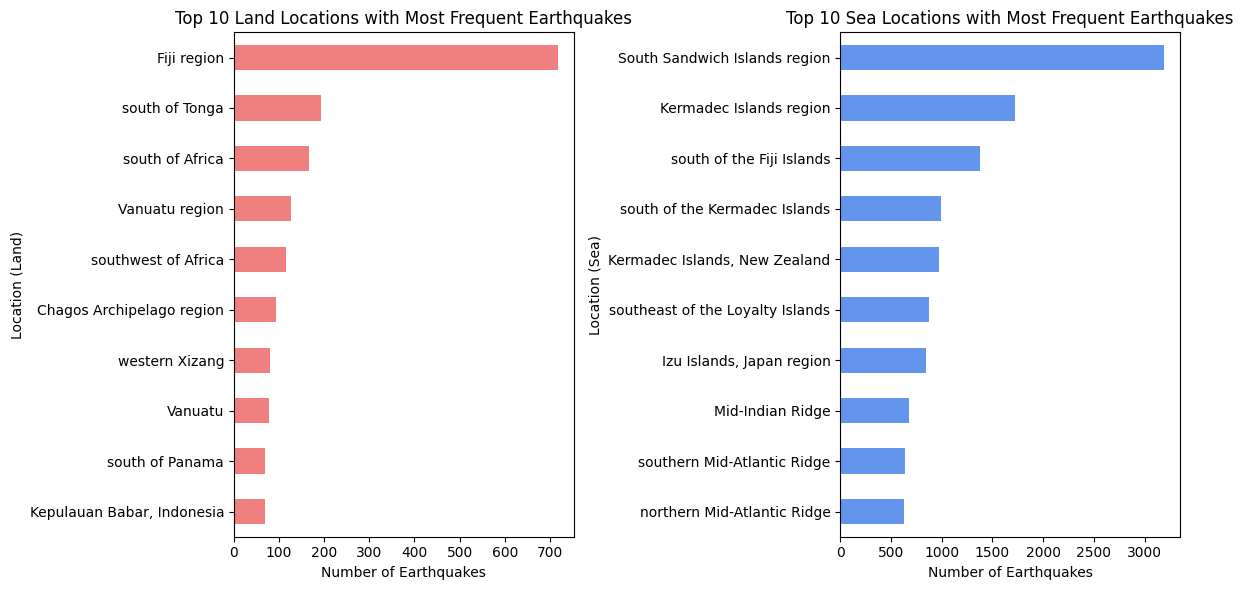

In [ ]:
# Analyze the top cities for each location type
top_land_cities = df[df['Location_Type'] == 'Land']['place'].value_counts().head(10)
top_sea_locations = df[df['Location_Type'] == 'Sea']['place'].value_counts().head(10)

print("\nTop 10 Land Locations with Most Frequent Earthquakes:")
print(top_land_cities)

print("\nTop 10 Sea Locations with Most Frequent Earthquakes:")
print(top_sea_locations)

# Visualize the top land and sea locations separately
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
top_land_cities.plot(kind='barh', color='lightcoral')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location (Land)')
plt.title('Top 10 Land Locations with Most Frequent Earthquakes')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
top_sea_locations.plot(kind='barh', color='cornflowerblue')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Location (Sea)')
plt.title('Top 10 Sea Locations with Most Frequent Earthquakes')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


Top 10 Land Locations with Most Tsunami-Generating Earthquakes:
place
off the coast of Oregon             23
Fiji region                          5
Southern Alaska                      5
Haida Gwaii Region, Canada           3
204 km W of Port McNeill, Canada     3
Vanuatu region                       3
6 km SSE of Big Lake, Alaska         2
261 km SE of Chiniak, Alaska         2
104 km SSW of Nikolski, Alaska       2
242 km WSW of Adak, Alaska           2
Name: count, dtype: int64

Top 10 Sea Locations with Most Tsunami-Generating Earthquakes:
place
Rat Islands, Aleutian Islands, Alaska    26
South Sandwich Islands region            13
Kermadec Islands, New Zealand            11
southeast of the Loyalty Islands          8
south of the Fiji Islands                 7
central Mid-Atlantic Ridge                4
Kermadec Islands region                   4
south of the Kermadec Islands             4
Bonin Islands, Japan region               3
Devon Island, Nunavut, Canada             3
Nam

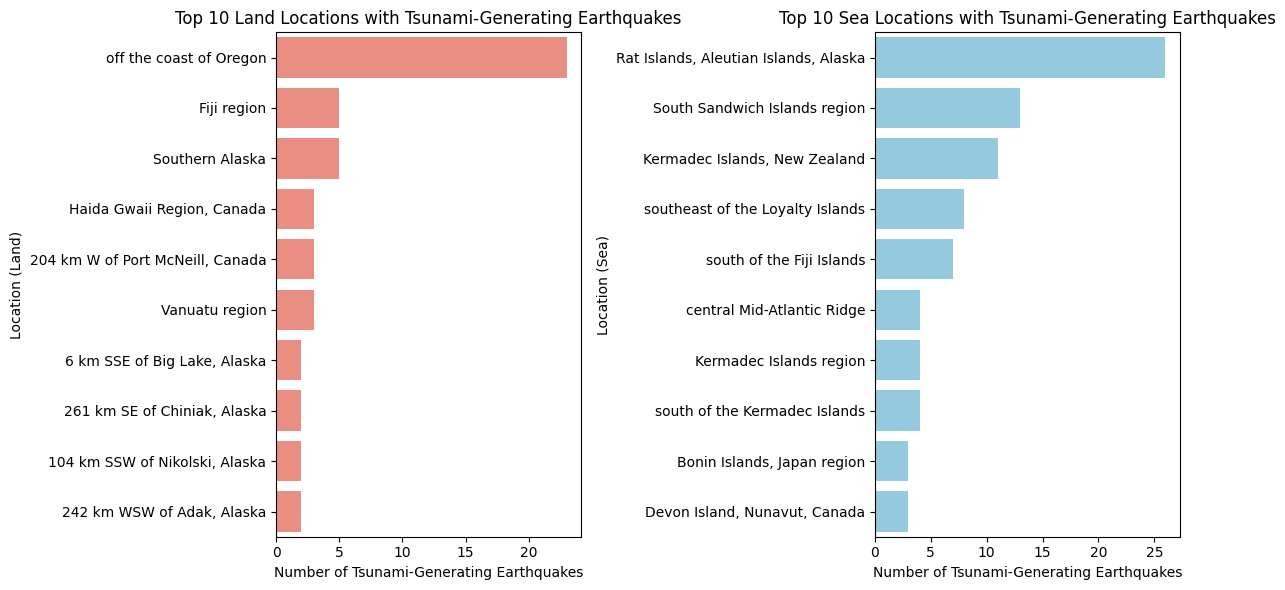

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determine if an earthquake occurred on land or at sea based on location names
# This is a simplified approach. A more accurate method would involve using GIS data.
def determine_location_type(location):
    # Simple keywords to identify sea/ocean locations
    sea_keywords = ['Sea', 'Ocean', 'Gulf', 'Bay', 'Strait', 'Ridge', 'Rise', 'Trench', 'Basin', 'Island','Islands']
    for keyword in sea_keywords:
        if keyword in location:
            return 'Sea'
    return 'Land'

# Create the 'Location_Type' column
df['Location_Type'] = df['place'].apply(determine_location_type)

# Filter dataset for tsunami-generating earthquakes
tsunami_df = df[df['tsunami'] == 1]

# Analyze the top cities/locations for each location type
top_land_cities_tsunami = tsunami_df[tsunami_df['Location_Type'] == 'Land']['place'].value_counts().head(10)
top_sea_locations_tsunami = tsunami_df[tsunami_df['Location_Type'] == 'Sea']['place'].value_counts().head(10)

print("\nTop 10 Land Locations with Most Tsunami-Generating Earthquakes:")
print(top_land_cities_tsunami)

print("\nTop 10 Sea Locations with Most Tsunami-Generating Earthquakes:")
print(top_sea_locations_tsunami)

# Sort values descending before plotting
top_land_cities_tsunami = top_land_cities_tsunami.sort_values(ascending=False)
top_sea_locations_tsunami = top_sea_locations_tsunami.sort_values(ascending=False)

# Visualize the top land and sea tsunami locations separately
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(
    x=top_land_cities_tsunami.values,
    y=top_land_cities_tsunami.index,
    color='salmon',
    orient='h'
)
plt.xlabel('Number of Tsunami-Generating Earthquakes')
plt.ylabel('Location (Land)')
plt.title('Top 10 Land Locations with Tsunami-Generating Earthquakes')

plt.subplot(1, 2, 2)
sns.barplot(
    x=top_sea_locations_tsunami.values,
    y=top_sea_locations_tsunami.index,
    color='skyblue',
    orient='h'
)
plt.xlabel('Number of Tsunami-Generating Earthquakes')
plt.ylabel('Location (Sea)')
plt.title('Top 10 Sea Locations with Tsunami-Generating Earthquakes')

plt.tight_layout()
plt.show()


In [ ]:
 #3. Bar chart of top 5 countries with highest average magnitudes
top_5_countries = df.groupby('Country')['mag'].mean().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 6))
top_5_countries.plot(kind='bar', color='coral')
plt.xlabel('Country')
plt.ylabel('Average Earthquake Magnitude')
plt.title('Top 5 Countries with Highest Average Earthquake Magnitudes')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

top_5_countries

KeyError: 'Country'

In [ ]:
# prompt: horizontal histogram of frequency most earthquakes
country_counts = df['Country'].value_counts().head(20)

plt.figure(figsize=(10, 6))
plt.barh(country_counts.index, country_counts.values, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Top 20 Countries with Most Recorded Earthquakes')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency at the top
plt.tight_layout()
plt.show()

In [ ]:
# prompt: horizontal histogram of of cities with frequent earthquake

import matplotlib.pyplot as plt
import seaborn as sns
# Group by City and count the number of earthquakes
city_earthquake_counts = df['place'].value_counts().head(10)
city_earthquake_counts

In [ ]:
# prompt: List of magnitude more than 7.0

# Filter for earthquakes with magnitude greater than 7.0
earthquakes_above_7 = df[df['magnitude'] > 7.0]

# Print the list of earthquakes with magnitude greater than 7.0
print("\nEarthquakes with Magnitude greater than 7.0:")
display(earthquakes_above_7)

In [ ]:
# display country, date, magnitude and city with highest magnitude

most_powerful_earthquake = df.loc[df['magnitude'].idxmax()]
print(f"Date: {most_powerful_earthquake['time']}")
print(f"Magnitude: {most_powerful_earthquake['magnitude']}")
print(f"City: {most_powerful_earthquake['place']}")

In [ ]:
import matplotlib.pyplot as plt

# Count frequency of earthquakes that generated tsunamis vs not
ring_of_fire_counts = df['tsunami'].value_counts()

print("\nFrequency of earthquakes that generated tsunami:")
print(ring_of_fire_counts)

# Map labels (0 = No tsunami, 1 = Tsunami generated)
labels = ring_of_fire_counts.index.map({0: "No Tsunami", 1: "Tsunami"})

# Prepare data
sizes = ring_of_fire_counts.values
colors = ['lightblue', 'lightcoral']

# Create the pie chart with labels inside
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=None,  # We'll add custom labels
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

# Customize each label inside the pie slice
for i, a in enumerate(autotexts):
    a.set_text(f"{labels[i]}: {a.get_text()}")  # Example: "Tsunami: 15.0%"

plt.title('Distribution of Earthquakes Generating Tsunamis')
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Count the frequency of earthquakes by continent
continent_counts = merged_df['Continent'].value_counts()

print("\nFrequency of earthquakes by Continent:")
print(continent_counts)

# Visualize the frequency using a pie chart
plt.figure(figsize=(8, 6))
plt.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Earthquakes by Continent')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart of the mean magnitude for each earthquake type
mean_mag_by_type = df.groupby('type')['magnitude'].mean().sort_values()
mean_mag_by_type.plot(kind='barh', figsize=(10,6))
plt.title('Mean Magnitude by Earthquake Type')
plt.xlabel('Magnitude')
plt.ylabel('Earthquake Type')
plt.show()

In [ ]:
# 4. World map (using Plotly, as demonstrated in the previous step)
try:
    import plotly.express as px
    fig = px.scatter_geo(df, lat='latitude', lon='longitude',
                         size='magnitude', hover_name='place',
                         projection="natural earth",
                         title='Earthquake Locations and Magnitudes',
                         color='magnitude',
                         color_continuous_scale=px.colors.sequential.Plasma)
    fig.show()
except ImportError:
    print("Plotly is not installed. Please install it to generate the world map visualization.")
except Exception as e:
    print(f"An error occurred during map generation: {e}")

# Data Transformation

In [ ]:
# Encode the zone classification
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
##print("Label encoding mapping for 'Zone Class':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")

earthquake → 0
mine collapse → 1
nuclear explosion → 2
volcanic eruption → 3


In [ ]:
# Encode the month
df['Month'] = le.fit_transform(df['Month'])
##print("Label encoding mapping for 'month':")
for label, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{label} → {code}")

April → 0
August → 1
December → 2
February → 3
January → 4
July → 5
June → 6
March → 7
May → 8
November → 9
October → 10
September → 11


In [ ]:
df

,time,place,magnitude,depth_km,longitude,latitude,type,tsunami,Year,Month,Location_Type
0,2015-01-01 05:01:10.640,"near the east coast of Honshu, Japan",4.8,41.390,142.0405,38.8957,0,0,2015,4,Land
1,2015-01-01 06:48:29.670,"93 km N of Isangel, Vanuatu",4.6,223.610,169.1795,-18.7052,0,0,2015,4,Land
2,2015-01-01 06:54:20.570,central Mid-Atlantic Ridge,4.7,10.000,-31.7641,3.4769,0,0,2015,4,Sea
3,2015-01-01 07:12:44.230,"120 km SSE of Kirakira, Solomon Islands",4.6,26.240,162.4998,-11.3818,0,0,2015,4,Sea
4,2015-01-01 08:49:53.200,"70 km W of F?r?z?b?d, Iran",5.1,10.100,51.8580,28.7280,0,0,2015,4,Land
...,...,...,...,...,...,...,...,...,...,...,...
72578,2024-12-30 22:13:14.697,"22 km NW of Āwash, Ethiopia",4.8,10.000,40.0367,9.1373,0,0,2024,2,Land
72579,2024-12-30 23:16:09.495,"181 km WNW of Pangai, Tonga",4.6,10.000,-175.9927,-19.2777,0,0,2024,2,Land
72580,2024-12-30 23:30:59.974,"24 km N of Metahāra, Ethiopia",4.7,10.000,39.9276,9.1189,0,0,2024,2,Land
72581,2024-12-30 23:40:33.868,"247 km ENE of Levuka, Fiji",4.6,573.817,-178.3937,-17.6089,0,0,2024,2,Land


In [ ]:
analysis = df[['longitude', 'latitude','depth_km', 'magnitude', 'Month', 'Year', 'tsunami']]
display(analysis.head())

,longitude,latitude,depth_km,magnitude,Month,Year,tsunami
0,142.0405,38.8957,41.39,4.8,4,2015,0
1,169.1795,-18.7052,223.61,4.6,4,2015,0
2,-31.7641,3.4769,10.00,4.7,4,2015,0
3,162.4998,-11.3818,26.24,4.6,4,2015,0
4,51.8580,28.7280,10.10,5.1,4,2015,0


In [ ]:
analysis.describe()

,longitude,latitude,depth_km,magnitude,Month,Year,tsunami
count,72571.000000,72571.000000,72571.000000,72571.000000,72571.000000,72571.000000,72571.000000
mean,33.335054,-1.808635,63.131648,4.803313,5.493034,2019.538424,0.013835
std,123.129062,29.755335,115.081476,0.371198,3.491763,2.838935,0.116805
min,-179.999700,-79.983700,0.000000,4.500000,0.000000,2015.000000,0.000000
25%,-72.265150,-22.231350,10.000000,4.500000,2.000000,2017.000000,0.000000
50%,92.482800,-5.119700,14.200000,4.700000,5.000000,2020.000000,0.000000
75%,141.492850,19.313400,57.735000,4.900000,9.000000,2022.000000,0.000000
max,179.999300,87.386000,683.360000,8.300000,11.000000,2024.000000,1.000000


Spearman Correlation Matrix:
           longitude  latitude  depth_km  magnitude     Month      Year  \
longitude   1.000000  0.239795  0.044346   0.001038 -0.011200 -0.020972   
latitude    0.239795  1.000000 -0.015054  -0.036528  0.014343  0.014028   
depth_km    0.044346 -0.015054  1.000000  -0.084707 -0.018055 -0.053307   
magnitude   0.001038 -0.036528 -0.084707   1.000000 -0.001459 -0.008941   
Month      -0.011200  0.014343 -0.018055  -0.001459  1.000000 -0.028470   
Year       -0.020972  0.014028 -0.053307  -0.008941 -0.028470  1.000000   
tsunami    -0.063586  0.112511  0.006108   0.140068 -0.005880 -0.012495   

            tsunami  
longitude -0.063586  
latitude   0.112511  
depth_km   0.006108  
magnitude  0.140068  
Month     -0.005880  
Year      -0.012495  
tsunami    1.000000  


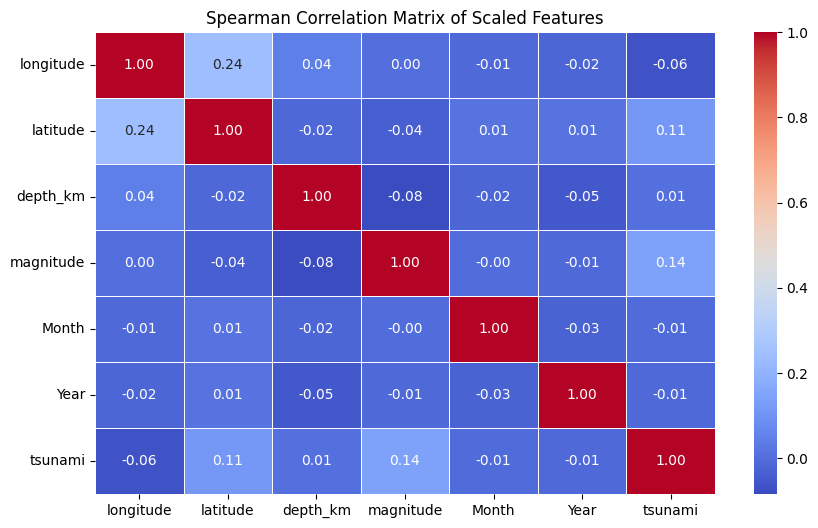

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Spearman correlation matrix
correlation_matrix = analysis.corr(method='spearman')

# Print the correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Matrix of Scaled Features')
plt.show()

# Normalize

# Feature Engineering


In [ ]:
analysis.head()

,longitude,latitude,depth_km,magnitude,Month,Year,tsunami
0,142.0405,38.8957,41.39,4.8,4,2015,0
1,169.1795,-18.7052,223.61,4.6,4,2015,0
2,-31.7641,3.4769,10.00,4.7,4,2015,0
3,162.4998,-11.3818,26.24,4.6,4,2015,0
4,51.8580,28.7280,10.10,5.1,4,2015,0


In [ ]:
correlation_matrix

,longitude,latitude,depth_km,magnitude,Month,Year,tsunami
longitude,1.000000,0.239795,0.044346,0.001038,-0.011200,-0.020972,-0.063586
latitude,0.239795,1.000000,-0.015054,-0.036528,0.014343,0.014028,0.112511
depth_km,0.044346,-0.015054,1.000000,-0.084707,-0.018055,-0.053307,0.006108
magnitude,0.001038,-0.036528,-0.084707,1.000000,-0.001459,-0.008941,0.140068
Month,-0.011200,0.014343,-0.018055,-0.001459,1.000000,-0.028470,-0.005880
Year,-0.020972,0.014028,-0.053307,-0.008941,-0.028470,1.000000,-0.012495
tsunami,-0.063586,0.112511,0.006108,0.140068,-0.005880,-0.012495,1.000000


In [ ]:
threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix) >= threshold].index.tolist()

# Remove the target from the list
selected_features.remove('tsunami')

print("Selected features based on correlation threshold:")
print(selected_features)

Selected features based on correlation threshold:
['longitude', 'latitude', 'depth_km', 'magnitude', 'Month', 'Year']


In [ ]:
analysis['tsunami']

,tsunami
0,0
1,0
2,0
3,0
4,0
...,...
72578,0
72579,0
72580,0
72581,0


# MACHINE LEARNING


## Split and Train

In [ ]:
X = analysis[selected_features]
y = analysis['tsunami']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X-train: ', X_train.shape)
print('y-train: ', y_train.shape)
print()
print('X-test: ', X_test.shape)
print('y-test: ', y_test.shape)

X-train:  (58056, 6)
y-train:  (58056,)

X-test:  (14515, 6)
y-test:  (14515,)


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred_rf= rf_classifier.predict(X_test)

#Evaluate model
result_rf = confusion_matrix(y_test, y_pred_rf)
classification_result_rf = classification_report(y_test, y_pred_rf)

In [ ]:
print("Confusion Matrix:")
print(result_rf)
print("Classification Report:",)
print (classification_result_rf)

result2 = accuracy_score(y_test,y_pred_rf)
print("Accuracy Random Forest:",result2)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Train the model
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate model
result_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_result_xgb = classification_report(y_test, y_pred_xgb)

In [ ]:
# Evaluate model
result_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix of XGBoost:")
print(result_xgb)

classification_result_xgb = classification_report(y_test, y_pred_xgb)
print("Classification Report of XGBoost:",)
print (classification_result_xgb)

result2_xgb = accuracy_score(y_test,y_pred_xgb)
print("Accuracy for XGboost:",result2_xgb)

# Model Evaluation

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test, y_pred_rf (from Random Forest), and y_pred_xgb (from XGBoost) are available from previous steps

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, rf_classifier.predict(X_test))
precision_rf = precision_score(y_test, rf_classifier.predict(X_test))
recall_rf = recall_score(y_test, rf_classifier.predict(X_test))
f1_rf = f1_score(y_test, rf_classifier.predict(X_test))

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, xgb_classifier.predict(X_test))
precision_xgb = precision_score(y_test, xgb_classifier.predict(X_test))
recall_xgb = recall_score(y_test, xgb_classifier.predict(X_test))
f1_xgb = f1_score(y_test, xgb_classifier.predict(X_test))


# Create a comparison table
results = {
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf],
    'XGBoost': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb]
}

results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T

# Optionally round the values for better readability
results_df = results_df.round(5)

# Display the table
print("Model Comparison (Classification Metrics):")
display(results_df)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from both models
y_pred_rf = rf_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)

# Generate confusion matrices
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print confusion matrices
print("Confusion Matrix for Random Forest:")
print(cm_rf)
print("\nConfusion Matrix for XGBoost:")
print(cm_xgb)

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='cornflowerblue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

# Model Validation and Optimization

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate

# Define model (no eval_metric or use_label_encoder needed)
model = RandomForestClassifier(random_state=42)

# Stratified K-Fold
skf_rf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for multiple metrics
scores_rf = cross_validate(
    model, X, y,
    cv=skf_rf,
    scoring=['accuracy','precision', 'recall','f1', 'roc_auc'],
    return_train_score=False
)

# Print results
print("Mean Accuracy:", scores_rf['test_accuracy'].mean())
print("Mean Precision Score:", scores_rf['test_precision'].mean())
print("Mean Recall:", scores_rf['test_recall'].mean())
print("Mean F1 Score:", scores_rf['test_f1'].mean())
print("Mean ROC AUC Score:", scores_rf['test_roc_auc'].mean())



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from xgboost import XGBClassifier

# Define model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Stratified K-Fold
skf_xgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for multiple metrics
scores_xgb = cross_validate(
    model, X, y,
    cv=skf_xgb,
    scoring=['accuracy','precision', 'recall','f1', 'roc_auc'],
    return_train_score=False
)

# Print results
print("Mean Accuracy:", scores_xgb['test_accuracy'].mean())
print("Mean Precision Score:",  scores_xgb['test_precision'].mean())
print("Mean Recall:",  scores_xgb['test_recall'].mean())
print("Mean F1 Score:",  scores_xgb['test_f1'].mean())
print("Mean ROC AUC Score:",  scores_xgb['test_roc_auc'].mean())

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Define parameter grid (smaller grid due to grid search's exhaustive nature)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize classifier
rf = RandomForestClassifier(random_state=42)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',  # focus on recall (or change to 'f1', 'accuracy' if needed)
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_rf_tuned = best_rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf_tuned)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_tuned))

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Recall):", grid_search.best_score_)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test set using the best Random Forest model
y_pred_tuned_rf = best_rf.predict(X_test)

# Calculate the accuracy
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)

print(f"Accuracy of the hyperparameter-tuned Random Forest model: {accuracy_tuned_rf:.4f}")

XGBOOST

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report

# Define fixed-size hyperparameter grid (162 combinations)
param_grid = {
    'n_estimators': [100, 200, 300],         # 3 values
    'max_depth': [5, 10, 15],                # 3 values
    'learning_rate': [0.01, 0.1, 0.2],       # 3 values
    'subsample': [0.7, 0.8, 1.0],            # 3 values
    'colsample_bytree': [0.8, 1.0]           # 2 values
}

# Initialize classifier
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Set up 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # You can also use 'f1' or 'accuracy'
    cv=cv,
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Predict
best_xgb = grid_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Recall):", grid_search.best_score_)


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1) for both models
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='cornflowerblue', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Random Forest AUC: {roc_auc_rf:.4f}")
print(f"XGBoost AUC: {roc_auc_xgb:.4f}")

#Comparative Results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Assuming you have the original models (rf_classifier, xgb_classifier) and tuned models (best_rf, best_xgb) and test data (X_test, y_test) available

# Evaluate Tuned Random Forest
accuracy_tuned_rf = accuracy_score(y_test, best_rf.predict(X_test))
precision_tuned_rf = precision_score(y_test, best_rf.predict(X_test))
recall_tuned_rf = recall_score(y_test, best_rf.predict(X_test))
f1_tuned_rf = f1_score(y_test, best_rf.predict(X_test))
roc_auc_tuned_rf = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

# Evaluate Tuned XGBoost
accuracy_tuned_xgb = accuracy_score(y_test, best_xgb.predict(X_test))
precision_tuned_xgb = precision_score(y_test, best_xgb.predict(X_test))
recall_tuned_xgb = recall_score(y_test, best_xgb.predict(X_test))
f1_tuned_xgb = f1_score(y_test, best_xgb.predict(X_test))
roc_auc_tuned_xgb = roc_auc_score(y_test, best_xgb.predict_proba(X_test)[:, 1])


# Create a comparison table including before and after tuning
comparison_results = {
    'Random Forest (Before Tuning)': [accuracy_rf, precision_rf, recall_rf, f1_rf, roc_auc_rf],
    'Random Forest (After Tuning)': [accuracy_tuned_rf, precision_tuned_rf, recall_tuned_rf, f1_tuned_rf, roc_auc_tuned_rf],
    'XGBoost (Before Tuning)': [accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, roc_auc_xgb],
    'XGBoost (After Tuning)': [accuracy_tuned_xgb, precision_tuned_xgb, recall_tuned_xgb, f1_tuned_xgb, roc_auc_tuned_xgb]
}

comparison_df = pd.DataFrame(comparison_results, index=['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC']).T

# Optionally round the values for better readability
comparison_df = comparison_df.round(5)

# Display the table
print("Model Performance Comparison (Before and After Tuning):")
display(comparison_df)

#test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Function to compute all metrics in the format shown in the picture
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_all = accuracy_score(pd.concat([y_train, y_test]),
                             pd.concat([pd.Series(y_pred_train), pd.Series(y_pred_test)]))

    # Precision, Recall, F1 per class
    prec = precision_score(y_test, y_pred_test, average=None)  # [No Damage, Damage]
    rec = recall_score(y_test, y_pred_test, average=None)
    f1 = f1_score(y_test, y_pred_test, average=None)

    return {
        'Train Acc': round(acc_train, 4),
        'Test Acc': round(acc_test, 4),
        'All Acc': round(acc_all, 4),
        'Prec Active Fault': round(prec[0], 4),
        'Prec Ring of Fire': round(prec[1], 4),
        'Rec Active Fault': round(rec[0], 4),
        'Rec Ring of Fire': round(rec[1], 4),
        'F1 Active Fault': round(f1[0], 4),
        'F1 Ring of Fire': round(f1[1], 4)
    }

# Example usage for before & after tuning models
results = {}
results['RF Before'] = evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
results['RF After'] = evaluate_model(best_rf, X_train, y_train, X_test, y_test)
results['XGB Before'] = evaluate_model(xgb_classifier, X_train, y_train, X_test, y_test)
results['XGB After'] = evaluate_model(best_xgb, X_train, y_train, X_test, y_test)

# Convert to DataFrame
df_comparison = pd.DataFrame(results).T

# Reorder columns like the example picture
df_comparison = df_comparison[[
    'Train Acc', 'Test Acc', 'All Acc',
    'Prec Active Fault','Prec Ring of Fire',
    'Rec Active Fault', 'Rec Ring of Fire',
    'F1 Active Fault', 'F1 Ring of Fire'
]]

print(df_comparison)


In [ ]:
from sklearn.metrics import confusion_matrix

# Get predictions from XGBoost model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Print confusion matrix
print("Confusion Matrix for Tuned XGBoost:")
print(cm_xgb_tuned)

# Extra with ROC and AUC

Random Forest

XGBOOSt

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions from XGBoost model
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrix for XGBoost
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions from both models
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)


# Generate confusion matrices
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Print confusion matrices
print("Confusion Matrix for Tuned Random Forest:")
print(cm_rf_tuned)
print("\nConfusion Matrix for Tuned XGBoost:")
print(cm_xgb_tuned)


# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = best_rf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best Random Forest model
feature_importances = best_xgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis() # Invert y-axis to show the most important features at the top
plt.tight_layout()

## Earthquake Analysis Dashboard

This dashboard presents key findings and model performance metrics from the analysis of earthquake data.

### 1. Data Summary Statistics

In [ ]:
display(df.describe())

### 2. Earthquake Frequency by Classification Zone

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of earthquakes in each Classification Zone
zone_counts = df['Classification Zone'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='viridis')
plt.xlabel("Classification Zone")
plt.ylabel("Number of Earthquakes")
plt.title("Frequency of Earthquakes by Classification Zone")
plt.show()

### 3. Top Countries with Most Earthquakes by Classification Zone

In [ ]:
# Group by Classification Zone and Country, then count
country_zone_counts = df.groupby(['Classification Zone', 'Country']).size().reset_index(name='Count')

# Find the top countries for each zone
top_countries_rf = country_zone_counts[country_zone_counts['Classification Zone'] == 'Ring of Fire'].sort_values(by='Count', ascending=False).head(10)
top_countries_af = country_zone_counts[country_zone_counts['Classification Zone'] == 'Active Faults'].sort_values(by='Count', ascending=False).head(10)

print("Top 10 Countries with Most Earthquakes in Ring of Fire:")
display(top_countries_rf)

print("\nTop 10 Countries with Most Earthquakes in Active Faults:")
display(top_countries_af)

### 4. Top Countries with Highest Average Magnitude by Classification Zone

### 5. Model Performance Comparison

In [ ]:
display(df_comparison)

### 6. Confusion Matrices (Tuned Models)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test, best_rf, and best_xgb are available from previous steps

# Get predictions from both models
y_pred_rf_tuned = best_rf.predict(X_test)
y_pred_xgb_tuned = best_xgb.predict(X_test)

# Generate confusion matrices
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
cm_xgb_tuned = confusion_matrix(y_test, y_pred_xgb_tuned)

# Visualize confusion matrices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_rf_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Active Faults', 'Ring of Fire'],
            yticklabels=['Active Faults', 'Ring of Fire'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### 7. Feature Importance Plots (Tuned Models)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_rf, best_xgb, and X_train are available from previous steps

# Get feature importances from the best Random Forest model
feature_importances_rf = best_rf.feature_importances_

# Get feature importances from the best XGBoost model
feature_importances_xgb = best_xgb.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create DataFrames for easier plotting
importance_df_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
importance_df_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})


# Sort features by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)


# Create bar plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned Random Forest)')
plt.gca().invert_yaxis() # Invert y-axis

plt.subplot(1, 2, 2)
plt.barh(importance_df_xgb['Feature'], importance_df_xgb['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Tuned XGBoost)')
plt.gca().invert_yaxis() # Invert y-axis

plt.tight_layout()
plt.show()

### Dashboard End

In [ ]:
most_powerful_earthquake = df.loc[df['mag'].idxmax()]
print(f"The country with the highest magnitude earthquake is: {most_powerful_earthquake['Country']}")
print(f"The magnitude of this earthquake was: {most_powerful_earthquake['mag']}")
print(f"It occurred in: {most_powerful_earthquake['place']}")
print(f"On: {most_powerful_earthquake['time']}")

In [ ]:
# Sort by 'mag' in descending order and select the top 10
top_10_earthquakes = df.sort_values(by='mag', ascending=False).head(10)

print("Top 10 Highest Magnitude Earthquakes:")
display(top_10_earthquakes)

In [ ]:
import plotly.express as px

# Create a scatter plot on a geographical map
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     size='mag',         # Size of markers based on magnitude
                     color='mag',        # Color of markers based on magnitude
                     hover_name='place', # Show place name on hover
                     projection="natural earth", # Specify map projection
                     title='Global Earthquake Distribution by Magnitude',
                     color_continuous_scale=px.colors.sequential.Plasma, # Color scale
                     hover_data=['Classification Zone', 'depth', 'Country', 'Continent_encoded']) # Include additional data on hover

fig.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for each classification zone
ring_of_fire_df = df[df['Classification Zone'] == 'Ring of Fire']
active_faults_df = df[df['Classification Zone'] == 'Active Faults']

# Find the highest magnitude in each zone
highest_mag_rf = ring_of_fire_df['mag'].max()
highest_mag_af = active_faults_df['mag'].max()

# Create a DataFrame for plotting
highest_mag_comparison = pd.DataFrame({
    'Classification Zone': ['Ring of Fire', 'Active Faults'],
    'Highest Magnitude': [highest_mag_rf, highest_mag_af]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Classification Zone', y='Highest Magnitude', data=highest_mag_comparison, palette='viridis')
plt.title('Highest Earthquake Magnitude by Classification Zone')
plt.xlabel('Classification Zone')
plt.ylabel('Highest Magnitude')
plt.ylim(0, highest_mag_comparison['Highest Magnitude'].max() + 1) # Set y-limit for better visualization
plt.show()

In [ ]:
import pandas as pd
plate = pd.read_csv('/content/drive/MyDrive/Earthquakes data/all.csv')

In [ ]:
plate

In [ ]:
print("Columns in df:")
print(df.columns)
print("\nColumns in plate:")
print(plate.columns)

In [ ]:
# List of specific plate combinations to filter for
specific_plates = [
    'Caribbean Plate / North American Plate',
    'North American Plate / Cocos Plate',
    'South American Plate / Pacific Plate'
]

# Filter the merged_df to show rows with these specific plate combinations
filtered_df = merged_df[merged_df['Second Plate (Collision Partner)'].isin(specific_plates)]

# Display the filtered dataframe
display(filtered_df)

In [ ]:
# List of specific plate combinations to filter for
specific_plates = [
    'Caribbean Plate / North American Plate',
    'North American Plate / Cocos Plate',
    'South American Plate / Pacific Plate'
]

# Filter the merged_df to show rows with these specific plate combinations
filtered_df = merged_df[merged_df['Second Plate (Collision Partner)'].isin(specific_plates)]

# Get the unique countries from the filtered dataframe
countries_with_specific_plates = filtered_df['Country'].unique()

# Print the unique countries
print("Countries associated with the specified plate combinations:")
countries_with_specific_plates

In [ ]:
# Display relevant columns from the filtered dataframe for unique countries
display(filtered_df[['Country', 'Main Plate', 'Second Plate (Collision Partner)']].drop_duplicates())

In [ ]:
# Filter for earthquakes that generated a tsunami
tsunami_earthquakes = df[df['tsunami'] == 1]

# Group by 'place' and calculate the mean magnitude
average_magnitude_by_place = tsunami_earthquakes.groupby('place')['magnitude'].mean()

# Sort by average magnitude in descending order and select the top 5
top_5_avg_magnitude_tsunami = average_magnitude_by_place.sort_values(ascending=False).head(5)

print("Top 5 Locations with Highest Average Magnitude Earthquakes that Generated Tsunamis:")
display(top_5_avg_magnitude_tsunami)